In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import seaborn as sns

In [2]:
data = pd.read_csv("APPLE4.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,13/11/2019,66.12,65.28,66.19,65.27,103.27M,0.96%
1,12/11/2019,65.49,65.39,65.70,65.23,87.39M,-0.09%
2,11/11/2019,65.55,64.58,65.62,64.57,82.03M,0.80%
3,08/11/2019,65.03,64.67,65.11,64.21,70.08M,0.26%
4,07/11/2019,64.86,64.69,65.09,64.53,94.94M,0.86%


In [4]:
data.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low       float64
Volume     object
Chg%       object
dtype: object

In [5]:
data.Date = pd.to_datetime(data.Date, dayfirst = True)

In [6]:
 data.set_index("Date",inplace = True)

In [7]:
data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2019-11-13,66.12,65.28,66.19,65.27,103.27M,0.96%
2019-11-12,65.49,65.39,65.70,65.23,87.39M,-0.09%
2019-11-11,65.55,64.58,65.62,64.57,82.03M,0.80%
2019-11-08,65.03,64.67,65.11,64.21,70.08M,0.26%
2019-11-07,64.86,64.69,65.09,64.53,94.94M,0.86%


In [8]:
 data = data.drop(['Open','Volume','Chg%','Low','High'],axis = 1)

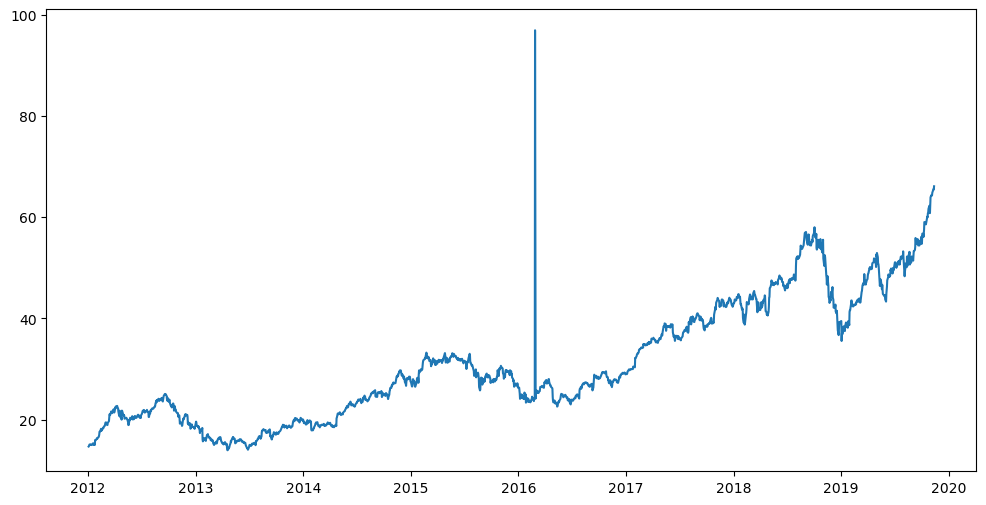

In [9]:
plt.figure(figsize = (12,6))
plt.plot(data.Price)

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
result = seasonal_decompose(data["Price"], model = 'additive',period = 21)

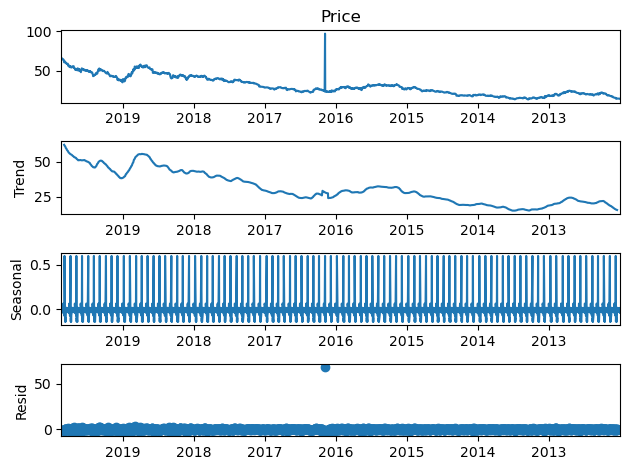

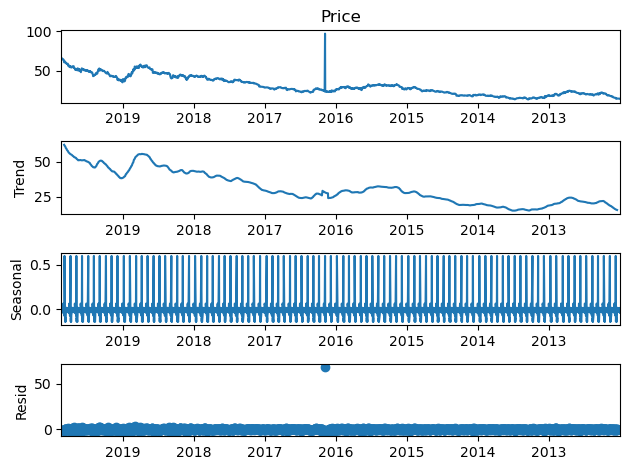

In [12]:
result.plot()

In [13]:
import statsmodels.tsa.stattools as sts

In [14]:
ad_ful = sts.adfuller(data.Price)

In [15]:
ad_ful

(-2.508871984379753,
 0.1133305713756727,
 7,
 1973,
 {'1%': -3.4336687168076714,
  '5%': -2.863006019389988,
  '10%': -2.567550447906854},
 8103.546485247267)

In [16]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [17]:
stepwise_fit = auto_arima(data['Price'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8193.382, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9042.956, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8525.021, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8187.928, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9041.193, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8189.475, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8189.460, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8188.855, Time=1.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8190.500, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.950 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1981
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4090.964
Date:                Tue, 24 Jan 2023   AIC                           8187.928
Time:                        17:15:13   BIC                           8204.701
Sample:                             0   HQIC                          8194.090
                               - 1981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0255      0.026     -0.995      0.320      -0.076       0.025
ma.L1         -0.7249      0.003   -239.322      0.000      -0.731      -0.719
sigma2         3.6475      0.011    333.310      0.000       3.626       3.669
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):          87319080.42
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            26.08
Prob(H) (two-sided):                  0.00   Kurtosis:                      1030.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
import statsmodels.api as sm

In [19]:
 dta = data

In [20]:
train = dta.iloc[:-30]
test = dta.iloc[-30:]

In [21]:
model = sm.tsa.arima.ARIMA(train['Price'], order=(1,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1951
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4043.176
Date:                Tue, 24 Jan 2023   AIC                           8094.353
Time:                        17:15:14   BIC                           8116.655
Sample:                             0   HQIC                          8102.552
                               - 1951                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9339      0.092     10.172      0.000       0.754       1.114
ma.L1         -1.6712      0.092    -18.234      0.000      -1.851      -1.492
ma.L2          0.6940      0.067     10.416      0.000       0.563       0.825
sigma2         3.7012      0.006    612.679      0.000       3.689       3.713
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          84067733.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            26.03
Prob(H) (two-sided):                  0.00   Kurtosis:                      1018.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
start = len(train)
end = len(test)+len(train)

In [23]:
pred = model.predict(start = start,end = end,typ = 'levels')

In [24]:
print(pred)

1951    18.070485
1952    18.040399
1953    18.012303
1954    17.986063
1955    17.961558
1956    17.938673
1957    17.917301
1958    17.897342
1959    17.878702
1960    17.861294
1961    17.845037
1962    17.829854
1963    17.815676
1964    17.802434
1965    17.790068
1966    17.778519
1967    17.767734
1968    17.757661
1969    17.748255
1970    17.739470
1971    17.731266
1972    17.723604
1973    17.716449
1974    17.709767
1975    17.703526
1976    17.697698
1977    17.692255
1978    17.687172
1979    17.682425
1980    17.677992
1981    17.673852
Name: predicted_mean, dtype: float64


In [25]:
print(data[-30:])

            Price
Date             
2012-02-14  18.19
2012-02-13  17.95
2012-02-10  17.62
2012-02-09  17.61
2012-02-08  17.02
2012-02-07  16.74
2012-02-06  16.57
2012-02-03  16.42
2012-02-02  16.25
2012-02-01  16.29
2012-01-31  16.30
2012-01-30  16.18
2012-01-27  15.97
2012-01-26  15.88
2012-01-25  15.95
2012-01-24  15.01
2012-01-23  15.26
2012-01-20  15.01
2012-01-19  15.28
2012-01-18  15.33
2012-01-17  15.17
2012-01-13  14.99
2012-01-12  15.05
2012-01-11  15.09
2012-01-10  15.12
2012-01-09  15.06
2012-01-06  15.09
2012-01-05  14.93
2012-01-04  14.77
2012-01-03  14.69
